### Librerias

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import triang

### Parametros de la distribucion triangular

In [93]:
# Parámetros de la distribución triangular original
a = 0      # límite inferior
b = 10     # límite superior
m = 4      # moda
c = (m - a) / (b - a)  # parámetro de forma (entre 0 y 1)

# Crear la distribución triangular con scipy.stats.triang
tri_dist = triang(c, loc=a, scale=(b - a))

# Media y desviación estándar
mu = tri_dist.mean()
sigma = tri_dist.std()

### Graficar PDF Y CDF de la triangular

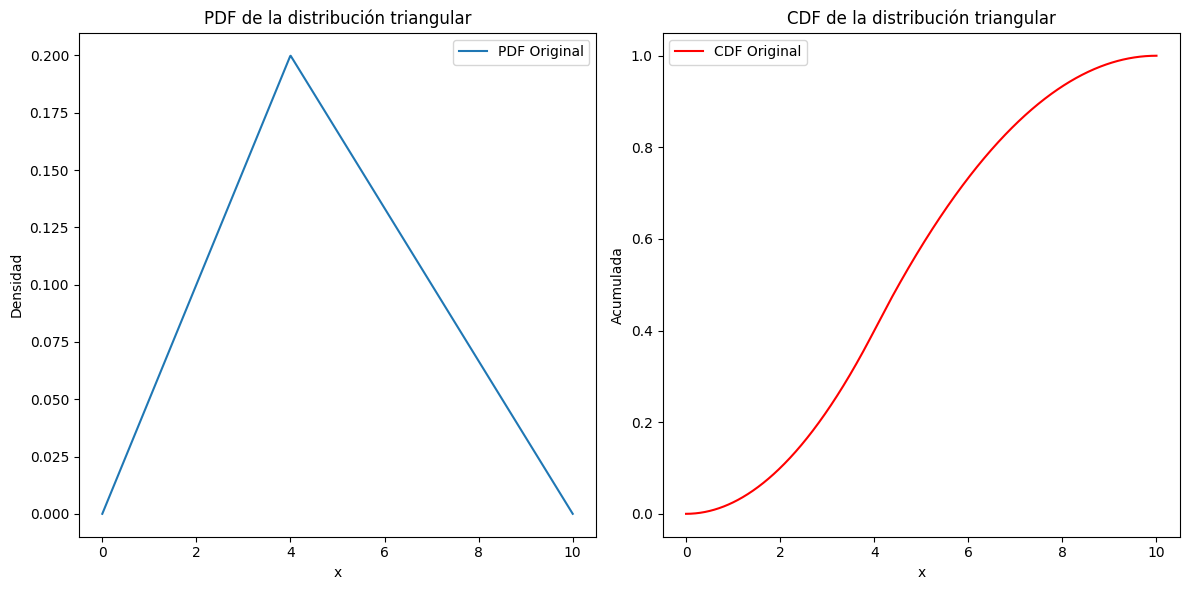

In [94]:
# Graficar PDF y CDF originales
x = np.linspace(a, b, 1000)
pdf_original = tri_dist.pdf(x)
cdf_original = tri_dist.cdf(x)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x, pdf_original, label="PDF Original")
plt.title("PDF de la distribución triangular")
plt.xlabel("x")
plt.ylabel("Densidad")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, cdf_original, label="CDF Original", color="red")
plt.title("CDF de la distribución triangular")
plt.xlabel("x")
plt.ylabel("Acumulada")
plt.legend()

plt.tight_layout()
plt.show()

## Truncamiento con valores absolutos

En este caso, para hacer el truncamiento utilizamos la definición:

Si la distribución original tiene una función de densidad $( f(x) )$ y una función de distribución acumulada $( F(x) )$, la función de densidad truncada se define como:

$$
f_{\text{trunc}}(x) = \begin{cases}
\frac{f(x)}{F(b) - F(a)} & \text{si } a \leq x \leq b, \\
0 & \text{en otro caso.}
\end{cases}
$$

y la función de distribución acumulada truncada es:

$$
F^*(x) = \begin{cases}
0 & \text{si } x < a, \\
\frac{F(x) - F(a)}{F(b) - F(a)} & \text{si } a \leq x \leq b, \\
1 & \text{si } x > b.
\end{cases}
$$

In [95]:
# --- Proceso de truncamiento ---
# Definimos el intervalo de truncamiento (debe estar dentro de [a, b])
d = 2   # límite inferior truncado
e = 8   # límite superior truncado

# Calculamos la probabilidad total en el intervalo [d, e] de la distribución original
cdf_d = tri_dist.cdf(d)
cdf_e = tri_dist.cdf(e)
norm_const = cdf_e - cdf_d  # constante de normalización

# Creamos las funciones de PDF y CDF truncadas re-normalizadas
x_trunc = np.linspace(d, e, 1000) # rango de valores truncados
pdf_trunc = tri_dist.pdf(x_trunc) / norm_const
cdf_trunc = (tri_dist.cdf(x_trunc) - cdf_d) / norm_const

def cdf_truncada(k):
    if k < d:
        return 0
    elif k > e:
        return 1
    else:
        return (tri_dist.cdf(k) - cdf_d) / norm_const

## Graficar PDF Y CDF de la triangular truncada

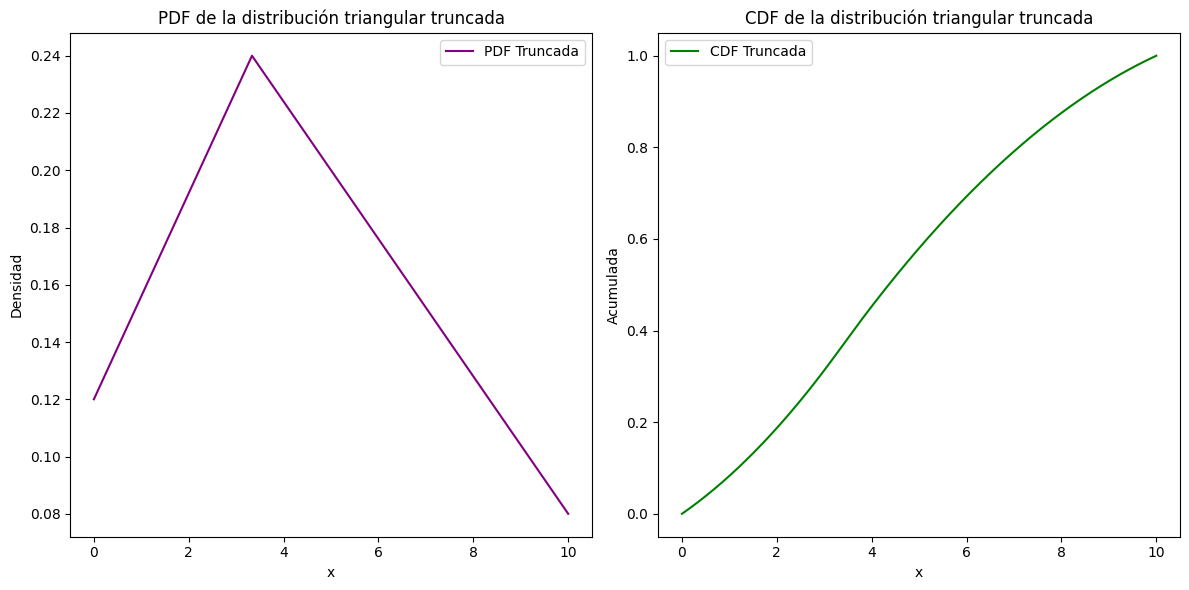

In [96]:
# Graficar PDF y CDF truncadas
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x, pdf_trunc, label="PDF Truncada", color="purple")
plt.title("PDF de la distribución triangular truncada")
plt.xlabel("x")
plt.ylabel("Densidad")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, cdf_trunc, label="CDF Truncada", color="green")
plt.title("CDF de la distribución triangular truncada")
plt.xlabel("x")
plt.ylabel("Acumulada")
plt.legend()

plt.tight_layout()
plt.show()


## Calculos de probabilidad

In [97]:
# Calcular probabilidad en la distribución triangular original de que X esté entre 3 y 7
p_original = tri_dist.cdf(7) - tri_dist.cdf(3)
print("Probabilidad en la distribución triangular original entre 3 y 7:", p_original)

# Calcular probabilidad en la distribución triangular original de que X esté entre 3 y 7
p_truncada = cdf_truncada(7) - cdf_truncada(3)
print("Probabilidad en la distribución triangular truncada entre 3 y 7:", p_truncada)

Probabilidad en la distribución triangular original entre 3 y 7: 0.6249999999999999
Probabilidad en la distribución triangular truncada entre 3 y 7: 0.75


## Truncamiento con Desviaciones estándar

In [98]:
# Calculamos las desviaciones estándar
def calc_desv_estandar(x, mu = mu, sigma = sigma):
    a = (mu - sigma*x)
    b = (mu + sigma*x)
    return a, b

# --- Proceso de truncamiento ---
# Definimos el intervalo de truncamiento (debe estar dentro de [a, b])
d, e = calc_desv_estandar(1)

# Calculamos la probabilidad total en el intervalo [d, e] de la distribución original
cdf_d = tri_dist.cdf(d)
cdf_e = tri_dist.cdf(e)
norm_const = cdf_e - cdf_d  # constante de normalización

# Creamos las funciones de PDF y CDF truncadas re-normalizadas
x_trunc = np.linspace(d, e, 1000) # rango de valores truncados
pdf_trunc = tri_dist.pdf(x_trunc) / norm_const
cdf_trunc = (tri_dist.cdf(x_trunc) - cdf_d) / norm_const

## Graficar PDF Y CDF de la triangular truncada

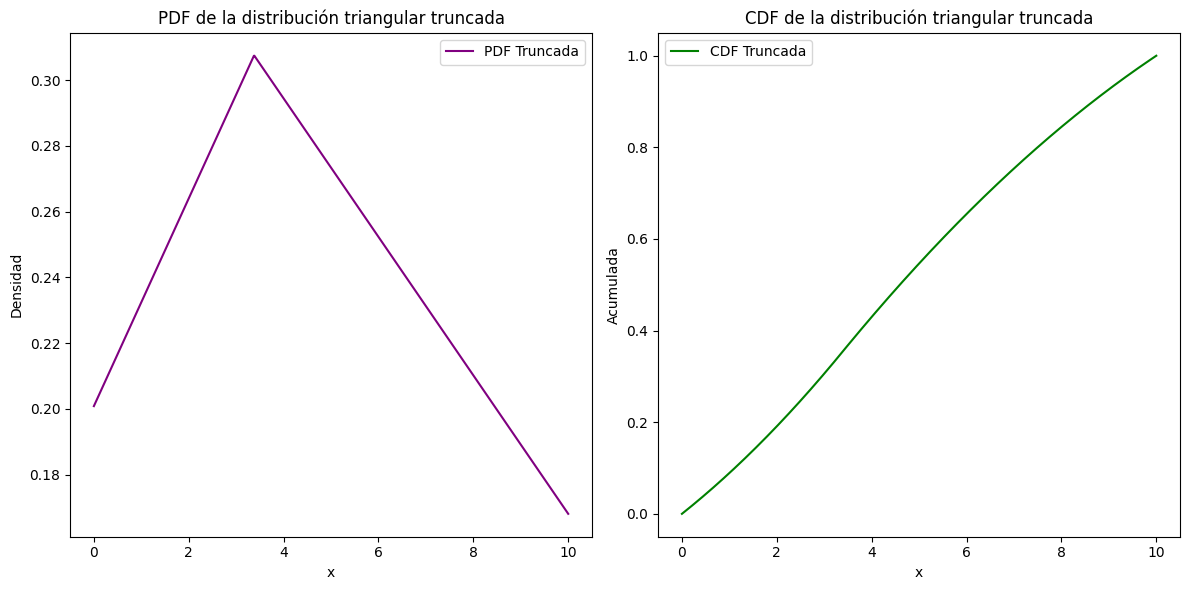

In [99]:
# Graficar PDF y CDF truncadas
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x, pdf_trunc, label="PDF Truncada", color="purple")
plt.title("PDF de la distribución triangular truncada")
plt.xlabel("x")
plt.ylabel("Densidad")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, cdf_trunc, label="CDF Truncada", color="green")
plt.title("CDF de la distribución triangular truncada")
plt.xlabel("x")
plt.ylabel("Acumulada")
plt.legend()

plt.tight_layout()
plt.show()


## Calculos de probabilidad

In [100]:
# Calcular probabilidad en la distribución triangular original de que X esté entre 3 y 7
p_original = tri_dist.cdf(7) - tri_dist.cdf(3)
print("Probabilidad en la distribución triangular original entre 3 y 7:", p_original)

# Calcular probabilidad en la distribución triangular original de que X esté entre 3 y 7
p_truncada = cdf_truncada(7) - cdf_truncada(3)
print("Probabilidad en la distribución triangular truncada entre 3 y 7:", p_truncada)

Probabilidad en la distribución triangular original entre 3 y 7: 0.6249999999999999
Probabilidad en la distribución triangular truncada entre 3 y 7: 0.916263719010311


## Truncamiento con percentiles

In [101]:
def calc_percentil(per):
    return tri_dist.ppf(per)


# --- Distribución truncada con el rango de la primera desviación estándar ---
d = calc_percentil(0.1)
e = calc_percentil(0.7)


# Calculamos la probabilidad total en el intervalo [d, e] de la distribución original
cdf_d = tri_dist.cdf(d)
cdf_e = tri_dist.cdf(e)
norm_const = cdf_e - cdf_d  # constante de normalización

# Creamos las funciones de PDF y CDF truncadas re-normalizadas
x_trunc = np.linspace(d, e, 1000) # rango de valores truncados
pdf_trunc = tri_dist.pdf(x_trunc) / norm_const
cdf_trunc = (tri_dist.cdf(x_trunc) - cdf_d) / norm_const

## Graficar PDF y CDF de la normal truncada

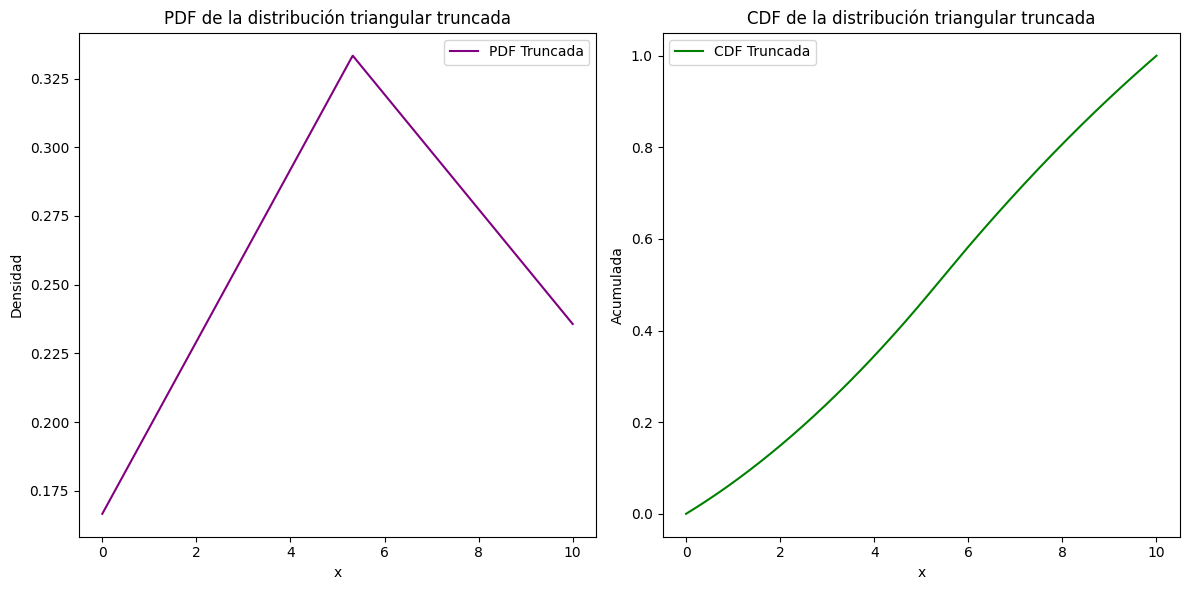

In [102]:
# Graficar PDF y CDF truncadas
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x, pdf_trunc, label="PDF Truncada", color="purple")
plt.title("PDF de la distribución triangular truncada")
plt.xlabel("x")
plt.ylabel("Densidad")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, cdf_trunc, label="CDF Truncada", color="green")
plt.title("CDF de la distribución triangular truncada")
plt.xlabel("x")
plt.ylabel("Acumulada")
plt.legend()

plt.tight_layout()
plt.show()

## Calculos de probabilidad

In [105]:
# Calcular probabilidad en la distribución triangular original de que X esté entre 3 y 7
p_original = tri_dist.cdf(7) - tri_dist.cdf(3)
print("Probabilidad en la distribución triangular original entre 3 y 7:", p_original)

# Calcular probabilidad en la distribución triangular original de que X esté entre 3 y 7
p_truncada = cdf_truncada(7) - cdf_truncada(3)
print("Probabilidad en la distribución triangular truncada entre 3 y 7:", p_truncada)

Probabilidad en la distribución triangular original entre 3 y 7: 0.6249999999999999
Probabilidad en la distribución triangular truncada entre 3 y 7: 0.7916666666666667
